In [12]:
# Importing required libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

In [13]:
# Reading the cleaned and processed data file.
df = pd.read_csv('./Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [14]:
# Removing the first column as this column is not useful for us in further processing.

df = df.drop(columns=df.columns[0], axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [15]:
# Encoding all the categorical variables into integers.

df['class'] = df['class'].replace({'Economy': 0, 'Business': 1})
df['stops'] = df['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2})
df["airline"] = df["airline"].replace({'Indigo':0, 'AirAsia':1, 'GO_FIRST':2, 'SpiceJet':3, 'Air_India':4, 'Vistara':5})
df['source_city'] = df['source_city'].replace({'Delhi': 0, 'Mumbai': 1, 'Bangalore': 2, 'Kolkata': 3, 'Hyderabad': 4, 'Chennai': 5})
df['destination_city'] = df['destination_city'].replace({'Delhi': 0, 'Mumbai': 1, 'Bangalore': 2, 'Kolkata': 3, 'Hyderabad': 4, 'Chennai': 5})
df['departure_time'] = df['departure_time'].replace({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})
df['arrival_time'] = df['departure_time'].replace({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})

df.head()

C:\Users\Aryan\AppData\Local\Temp\ipykernel_20872\472728555.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'Economy': 0, 'Business': 1})
C:\Users\Aryan\AppData\Local\Temp\ipykernel_20872\472728555.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['stops'] = df['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2})
C:\Users\Aryan\AppData\Local\Temp\ipykernel_20872\472728555.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,3,SG-8709,0,4,0,4,1,0,2.17,1,5953
1,3,SG-8157,0,1,0,1,1,0,2.33,1,5953
2,1,I5-764,0,1,0,1,1,0,2.17,1,5956
3,5,UK-995,0,2,0,2,1,0,2.25,1,5955
4,5,UK-963,0,2,0,2,1,0,2.33,1,5955


In [16]:
# Excluding the below columnns from the Training and Testing data.
columns_to_exclude = ['flight', 'price']

# Creating a new DataFrame for the Training data and Testing data.
x = df.drop(columns=columns_to_exclude)
y = df[['price']]

In [17]:
# Splitting the dataset into Training and Testing data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [18]:
# List of estimators.
estimators_list = [10, 50, 100]
performance_metrics = {'MAE': [], 'MSE': [], 'RMSE': [], 'R2_score': [], 'RMSLE': []}

In [19]:
# Initiating and training the model.
modelbag = BaggingRegressor()
modelbag.fit(x_train, y_train)
y_pred = modelbag.predict(x_test)

c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [21]:
for n_estimators in estimators_list:
    model = BaggingRegressor(n_estimators=n_estimators, random_state=42)
    # Ensure y_train is a 1-dimensional array
    # Convert y_train to a numpy array and then ravel it
    model.fit(x_train, y_train.values.ravel())  # This line is changed
    y_pred = model.predict(x_test)

    # Calculating evaluation metrics
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_score = metrics.r2_score(y_test, y_pred)
    # Ensure y_test is suitable for operations, assuming it might need conversion to numpy array
    if isinstance(y_test, pd.DataFrame) or isinstance(y_test, pd.Series):
        y_test_array = y_test.values.flatten()  # Flatten to ensure compatibility
    else:
        y_test_array = y_test  # If y_test is already a numpy array
    RMSLE = np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_test_array))**2))

    # Storing metrics
    performance_metrics['MAE'].append(MAE)
    performance_metrics['MSE'].append(MSE)
    performance_metrics['RMSE'].append(RMSE)
    performance_metrics['R2_score'].append(R2_score)
    performance_metrics['RMSLE'].append(RMSLE)


In [22]:
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

Mean Absolute Error (MAE): 1125.109
Mean Squared Error (MSE): 8081281.232
Root Mean Squared Error (RMSE): 2842.759
R2_score: 0.984323
Root Mean Squared Log Error (RMSLE): 7.953


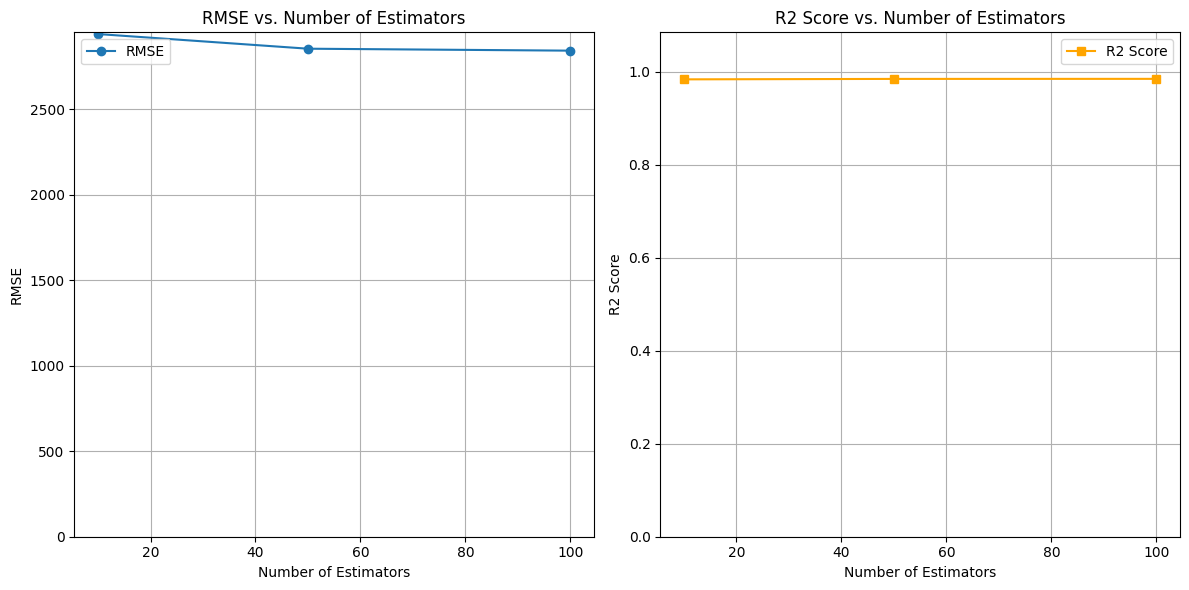

In [23]:
# Defining limits for y-axis based on the performance metrics
rmse_limit = max(performance_metrics['RMSE']) + 10
r2_limit = max(performance_metrics['R2_score']) + 0.1

# We'll use separate plots for RMSE and R2 Score
plt.figure(figsize=(12, 6))

# Plot for RMSE
plt.subplot(1, 2, 1)
plt.plot(estimators_list, performance_metrics['RMSE'], marker='o', label='RMSE')
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Estimators')
plt.ylim(0, rmse_limit)
plt.grid(True)
plt.legend()

# Plot for R2 Score
plt.subplot(1, 2, 2)
plt.plot(estimators_list, performance_metrics['R2_score'], marker='s', label='R2 Score', color='orange')
plt.xlabel('Number of Estimators')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Number of Estimators')
plt.ylim(0, r2_limit)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
# Performance evaluation for all the estimator values.
performance_metrics

{'MAE': [1149.4817632245827, 1126.9076813582824, 1125.1086176185293],
 'MSE': [8643239.068948435, 8146460.230240505, 8081281.232021331],
 'RMSE': [2939.9386165272967, 2854.2004537594244, 2842.7594397031435],
 'R2_score': [0.9832327133014525, 0.9841964299298993, 0.9843228726837265],
 'RMSLE': [0.14715193793206677, 0.14230818899355951, 0.14145566049538305]}

### Inference
It can be seen that, by increasing the number of estimators from 10 to 50, the MSE value significantly improved. However, there is not much effect on the MSE value when estimators were further increased from 50 to 100.